In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# import citipy
from citipy import citipy

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [17]:
city_data = []

In [18]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [19]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [20]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [21]:
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | baracoa
Processing Record 2 of Set 1 | dmitriyevka
Processing Record 3 of Set 1 | bolshoy lug
Processing Record 4 of Set 1 | namatanai
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | kaga
Processing Record 8 of Set 1 | tripoli
Processing Record 9 of Set 1 | kloulklubed
Processing Record 10 of Set 1 | kandry
Processing Record 11 of Set 1 | payakumbuh
Processing Record 12 of Set 1 | hyeres
Processing Record 13 of Set 1 | praia da vitoria
Processing Record 14 of Set 1 | wanning
Processing Record 15 of Set 1 | cockburn town
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | prainha
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | itarema
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | gat
Processing Record 23 of Set 1 | castr

Processing Record 39 of Set 4 | riohacha
Processing Record 40 of Set 4 | pokhara
Processing Record 41 of Set 4 | eregli
Processing Record 42 of Set 4 | aljezur
Processing Record 43 of Set 4 | garissa
Processing Record 44 of Set 4 | balad
Processing Record 45 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 46 of Set 4 | rotenburg
Processing Record 47 of Set 4 | huilong
Processing Record 48 of Set 4 | provideniya
Processing Record 49 of Set 4 | hasaki
Processing Record 50 of Set 4 | ruatoria
City not found. Skipping...
Processing Record 1 of Set 5 | skjervoy
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | quatre cocos
Processing Record 4 of Set 5 | puerto baquerizo moreno
Processing Record 5 of Set 5 | yar-sale
Processing Record 6 of Set 5 | coahuayana
Processing Record 7 of Set 5 | goderich
Processing Record 8 of Set 5 | meulaboh
Processing Record 9 of Set 5 | port lincoln
Processing Record 10 of Set 5 | tabas
Processing Record 11 of Set 5 |

Processing Record 28 of Set 8 | phan thiet
Processing Record 29 of Set 8 | trinidad
Processing Record 30 of Set 8 | tadine
Processing Record 31 of Set 8 | babanusah
City not found. Skipping...
Processing Record 32 of Set 8 | bacuit
City not found. Skipping...
Processing Record 33 of Set 8 | nyurba
Processing Record 34 of Set 8 | safford
Processing Record 35 of Set 8 | ambilobe
Processing Record 36 of Set 8 | gap
Processing Record 37 of Set 8 | khandyga
Processing Record 38 of Set 8 | ostrovnoy
Processing Record 39 of Set 8 | tir pol
City not found. Skipping...
Processing Record 40 of Set 8 | kostino
Processing Record 41 of Set 8 | pringsewu
Processing Record 42 of Set 8 | mingyue
Processing Record 43 of Set 8 | aklavik
Processing Record 44 of Set 8 | concepcion del oro
Processing Record 45 of Set 8 | shevchenkove
Processing Record 46 of Set 8 | dudinka
Processing Record 47 of Set 8 | san policarpo
Processing Record 48 of Set 8 | maniitsoq
Processing Record 49 of Set 8 | strezhevoy
Proc

Processing Record 18 of Set 12 | changli
Processing Record 19 of Set 12 | kahului
Processing Record 20 of Set 12 | bethel
Processing Record 21 of Set 12 | benguela
Processing Record 22 of Set 12 | kununurra
Processing Record 23 of Set 12 | yen bai
Processing Record 24 of Set 12 | shchelyayur
City not found. Skipping...
Processing Record 25 of Set 12 | arkhangelsk
Processing Record 26 of Set 12 | garmsar
Processing Record 27 of Set 12 | coihaique
Processing Record 28 of Set 12 | tokmak
Processing Record 29 of Set 12 | maryville
Processing Record 30 of Set 12 | kurilsk
Processing Record 31 of Set 12 | alim
Processing Record 32 of Set 12 | makaryev
Processing Record 33 of Set 12 | havelock
Processing Record 34 of Set 12 | novo aripuana
Processing Record 35 of Set 12 | la carlota
Processing Record 36 of Set 12 | moron
Processing Record 37 of Set 12 | camacha
Processing Record 38 of Set 12 | avera
Processing Record 39 of Set 12 | nacala
Processing Record 40 of Set 12 | motygino
Processing R

In [11]:
len(city_data)

0

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Markova,48.6758,24.4138,60.39,88,100,2.93,UA,2021-06-05 17:10:17
1,Busselton,-33.6500,115.3333,56.08,79,16,11.21,AU,2021-06-05 17:10:18
2,New Norfolk,-42.7826,147.0587,45.72,67,63,2.28,AU,2021-06-05 17:10:18
3,Butaritari,3.0707,172.7902,82.40,70,42,6.58,KI,2021-06-05 17:10:18
4,Hualmay,-11.0964,-77.6139,69.48,69,39,10.18,PE,2021-06-05 17:10:18
5,Buraydah,26.3260,43.9750,102.54,6,14,7.38,SA,2021-06-05 17:10:19
6,Talnakh,69.4865,88.3972,26.26,97,94,3.69,RU,2021-06-05 17:10:19
7,Punta Arenas,-53.1500,-70.9167,39.31,87,20,7.56,CL,2021-06-05 17:09:41
8,Hobart,-42.8794,147.3294,46.26,73,75,1.01,AU,2021-06-05 17:05:26
9,Guerrero Negro,27.9769,-114.0611,71.71,53,4,11.65,MX,2021-06-05 17:10:20


In [13]:
new_column_order  = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Markova,UA,2021-06-05 17:10:17,48.6758,24.4138,60.39,88,100,2.93
1,Busselton,AU,2021-06-05 17:10:18,-33.6500,115.3333,56.08,79,16,11.21
2,New Norfolk,AU,2021-06-05 17:10:18,-42.7826,147.0587,45.72,67,63,2.28
3,Butaritari,KI,2021-06-05 17:10:18,3.0707,172.7902,82.40,70,42,6.58
4,Hualmay,PE,2021-06-05 17:10:18,-11.0964,-77.6139,69.48,69,39,10.18


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1622917164.3374171

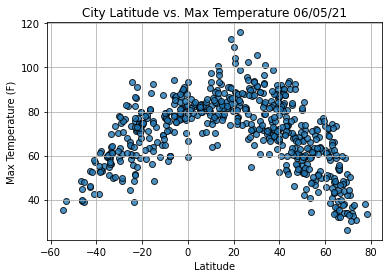

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

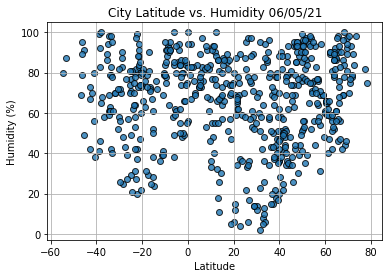

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

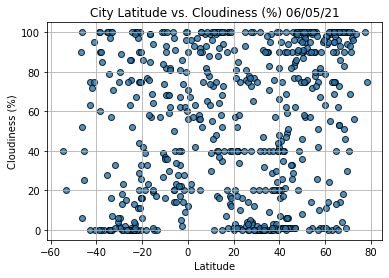

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

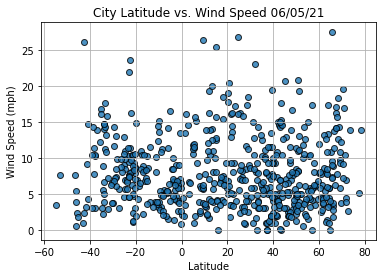

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

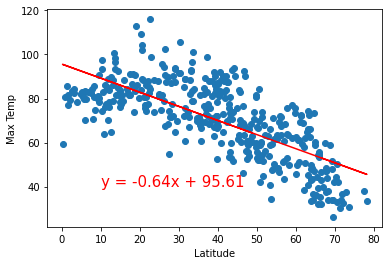

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

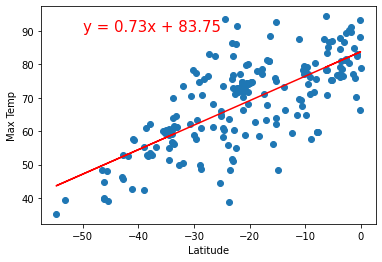

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

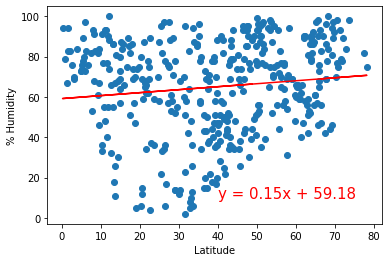

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

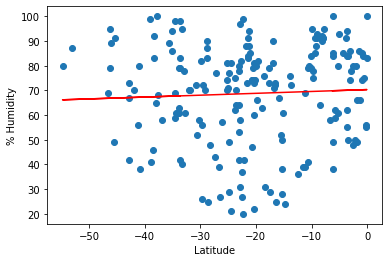

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       n for % Humidity', '% Humidity',(-50,15))

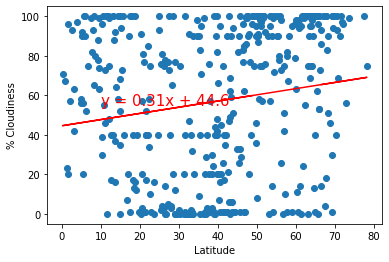

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

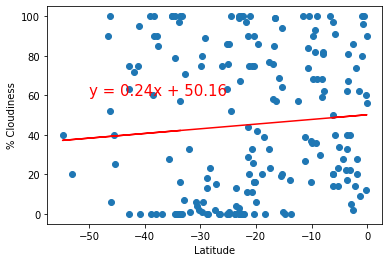

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

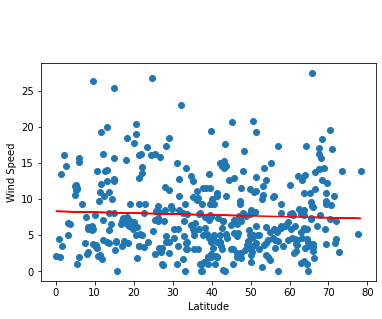

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

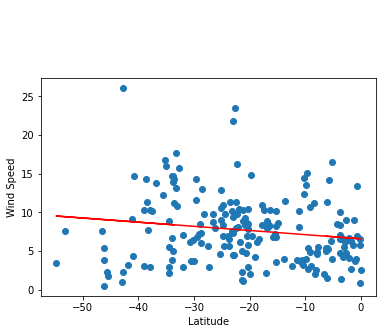

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))